In [1]:
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [188]:
path1 = 'data_train/64/'
path2 = 'data_train/64-sources/'

In [189]:
fname = '1200.png'
p1 = np.array(Image.open(path1 + fname))
p2 = np.array(Image.open(path2 + fname))

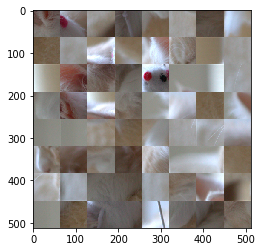

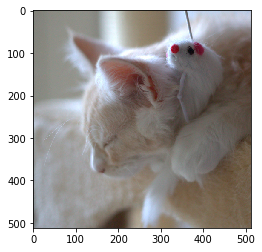

In [190]:
plt.imshow(p1)
plt.show()
plt.imshow(p2)

In [191]:
def points(p2):
    pnts = []
    for i in range(8):
        pi = 32 + i*64
        for j in range(8):
            pj = 32 + j*64
            if len(p2.shape) == 3:
                pnt = (p2[pi][pj][0], p2[pi - 16][pj][0], p2[pi][pj - 16][0], p2[pi + 16][pj][0], p2[pi][pj + 16][0])
            else:
                pnt = (p2[pi][pj], p2[pi - 16][pj], p2[pi][pj - 16], p2[pi + 16][pj], p2[pi][pj + 16])
            pnts.append(pnt)
    return pnts

In [192]:
def check(pnt1, iden, p1):
    for i in range(8):
        pi = 32 + i*64
        for j in range(8):
            pj = 32 + j*64
            if (i,j) not in iden:
                if len(p1.shape) == 3:
                    pnt2 = (p1[pi][pj][0], p1[pi - 16][pj][0], p1[pi][pj - 16][0], p1[pi + 16][pj][0], p1[pi][pj + 16][0])
                else:
                    pnt2 = (p1[pi][pj], p1[pi - 16][pj], p1[pi][pj - 16], p1[pi + 16][pj], p1[pi][pj + 16])
                #print(pnt2)
                if pnt1 == pnt2:
                    return (i,j)
                
def find(a, p1):
    return p1[a[0]*64:(a[0]+1)*64,a[1]*64:(a[1]+1)*64]

In [193]:
def fin(pnts, p1):
    iden = []
    img = 0
    for i in range(8):
        img1 = 0
        for j in range(8):
            pnt1 = pnts[i*8 + j]
            pnt2 = check(pnt1, iden, p1)
            iden.append(pnt2)
            img2 = find(pnt2, p1)
            if type(img1) == type(0):
                img1 = img2
            else:
                img1 = np.concatenate((img1, img2), axis = 1)
        if type(img) == type(0):
            img = img1
        else:
            img = np.concatenate((img, img1), axis = 0)
    return img

def fin1(pnts, p1):
    iden = []
    ans = []
    img = 0
    for i in range(8):
        img1 = 0
        for j in range(8):
            pnt1 = pnts[i*8 + j]
            pnt2 = check(pnt1, iden, p1)
            iden.append(pnt2)
            ans.append(pnt2[0]*8 + pnt2[1])
    return ans

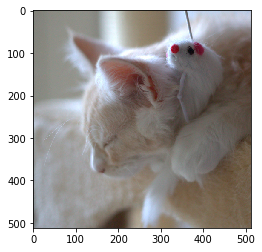

In [194]:
'''im1 = find(check(pnts[0], iden))
im2 = find(check(pnts[1], iden))
plt.imshow(np.concatenate((im1, im2), axis = 0))
'''
plt.imshow(img)

In [195]:
def fin_fun(fname):
    p1 = np.array(Image.open(path1 + fname))
    p2 = np.array(Image.open(path2 + fname))
    
    plt.imshow(p1)
    plt.show()
    plt.imshow(p2)
    plt.show()
    
    k = fin(points(p2),p1)
    plt.imshow(k)
    return k

def fin_fun1():
    path1 = 'data_train/64/'
    path2 = 'data_train/64-sources/'
    fname_ = '.png'
    '''
    plt.imshow(p1)
    plt.show()
    plt.imshow(p2)
    plt.show()
    '''
    k = []
    for i in range(1200,1800):
        p1 = np.array(Image.open(path1 + str(i) + fname_))
        p2 = np.array(Image.open(path2 + str(i) + fname_))
        print(i)
        ki = fin1(points(p2),p1)
        k.append(ki)
    #plt.imshow(k)
    return k

In [196]:
ans = fin_fun1()

1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399


In [218]:
file = open('submission.txt', 'w+')
for i in range(1200,1800):
    file.write(str(i)+'.png\n')
    file.write(str(s) + ' ' for s in ans[i-1200])
    file.write('\n')

TypeError: 'NoneType' object is not callable

In [230]:
txt = ""
txt.join([str(ele) for ele in ans[0]] )

TypeError: 'NoneType' object is not callable

In [238]:
a = 20
print(type(a))
str(a)

<class 'int'>


TypeError: 'NoneType' object is not callable

In [19]:
t[:1].shape

TensorShape([Dimension(1), Dimension(2), Dimension(3)])

In [25]:
t1 = tf.Constant[[1, 2, 3, 4, 5, 6]]

AttributeError: module 'tensorflow' has no attribute 'Constant'

In [21]:
t2 = [[7, 8, 9, 10, 11, 12]]

In [22]:
tf.concat([t1, t2], 0)  # [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

<tf.Tensor 'concat:0' shape=(2, 6) dtype=int32>

In [23]:
t1.shape

AttributeError: 'list' object has no attribute 'shape'